In [6]:
import random 
import numpy as np
import matplotlib.pyplot as plt
import sys

In [7]:
class Node:
    def __init__(self,i,j,g,h,previous,counter):
        self.i = i
        self.j = j
        self.g = g
        self.h = h
        self.f = g + h
        self.previous = previous
        self.counter = counter
        self.isBlocked = False
        self.priority = 10*self.f - g


In [1]:
class MinHeap:
    def __init__(self):
        self.heap = []
    
    def isEmpty(self):
        return len(self.heap) == 0
    
    def addNode(self, node):
        self.heap.append(node)
        self._heapifyUp()
        return self.heap

    def getMinNode(self):
        return self.heap[0]
    
    def popMinNode(self):
        if len(self.heap) == 0:
            return None
        else:
            minEle = self.heap[0]
            self.heap[0] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDown()
            return minEle

    def removeNode(self, node):
        z = search(Node)
        if z:
            removed = self.heap[z]
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            return removed
    
    def upsert(self,oldNode,newNode):
        z = self.search(oldNode)
        if z:
            self.heap[z] = self.heap[len(self.heap)-1]
            self.heap.pop()
            self._heapifyDownInd(z)
            self.addNode(newNode)
            return self.heap
        else:
            self.addNode(newNode)
            return self.heap
        
    def search(self, node):
        heap = self.heap
        for x in range(0,len(heap)):
            if self.heap[x].i == node.i and self.heap[x].j == node.j:
                return x
                
    def _heapifyUpInd(self, i):
        heap = self.heap
        size = i
        if len(heap) == 1 :
            return heap
        else:
            while size//2 > 0:
                parent = (size)//2 - 1
                curLast = size-1
                if heap[curLast].f < heap[parent].f:
                    swpNode = heap[curLast]
                    heap[curLast] = heap[parent]
                    heap[parent] = swpNode
                size = size//2
            return heap

    def _heapifyUp(self):
        self._heapifyUpInd(len(self.heap))
    
    def _heapifyDownInd(self,ind):
        size = len(self.heap)
        curr = ind
        while (curr+1)*2 <= size:
            minInd = self._nextMinNode(curr)      
            if self.heap[minInd].f < self.heap[curr].f: #should change to priority
                swpNode = self.heap[minInd]
                self.heap[minInd] = self.heap[curr]
                self.heap[curr] = swpNode
            curr = minInd
        return self.heap

    def _heapifyDown(self):
        self._heapifyDownInd(0)

    def _nextMinNode(self, index):
        if (index+1)*2 + 1 > len(self.heap):
            return index*2 + 1 
        else:
            if self.heap[index*2 + 1].f < self.heap[index*2 + 2].f:
                return index*2 + 1
            else:
                return index*2 + 2
    
    def printHeap(self):
        heap = self.heap
        for x in range(0,len(heap)):
            print("i-",heap[x].i,"j-",heap[x].j,"f-",heap[x].f)
        
    def size(self):
        return len(self.heap)


In [2]:
def generate_random_matrix(input,visited,i,j):
    visited[i][j] = 1
    input[i][j] = 1

    if  j + 1 < len(input) and input[i][j+1] == 0: 
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j+1)
        else:
            visited[i][j+1] = 1
            input[i][j+1] = -1
      
    if  j - 1 >= 0 and input[i][j-1] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i,j-1)
        else:
            visited[i][j-1] = 1
            input[i][j-1] = -1

    if i -1 >=0 and input[i-1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i-1,j)
        else:
            visited[i-1][j] = 1
            input[i-1][j] = -1

    if i + 1 < len(input) and input[i+1][j] == 0:
        rand_value = get_rand_value()
        if rand_value == 1:
            generate_random_matrix(input,visited,i+1,j)
        else:
            visited[i+1][j] = 1
            input[i+1][j] = -1

def get_rand_value():
    rand_value = random.randint(0,9)
    if rand_value in [0,2]:
        return -1
    else:
        return 1

def get_unvisited_indices(visited):
    for i in range(0,len(visited)):
        for j in range(0,len(visited)):
            if visited[i][j] == 0:
                return i,j
    return -1,-1


In [10]:

# priority queue
def update_priority_queue(i,j,open_list):
    index = 0
    for element in open_list.queue:
        if element[1][0] == i and element[1][1] == j:
            open_list.queue.pop(index)
            break
        index = index + 1
    
    open_list.put((nodes[i][j].f,(i,j)))


In [11]:
def updateCounter(i,j,nodes,counter):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes) and nodes[i][j].counter != counter:
        nodes[i][j].counter = counter
        nodes[i][j].g = sys.maxsize - 1000
        nodes[i][j].f = nodes[i][j].g + nodes[i][j].h
        nodes[i][j].previous = None

def computePath(maze,goal_node,nodes,open_list,counter):
    
    while open_list.qsize() > 0:
        print(open_list.queue)
        current_node_tuple = open_list.get()
        current_node = nodes[current_node_tuple[1][0]][current_node_tuple[1][1]]
        print('current node',current_node.i,current_node.j)
    
      if nodes[goal_node.i][goal_node.j].f > current_node.f:
            i = current_node.i
            j = current_node.j
            updateCounter(i - 1,j,nodes,counter)
            if i - 1 >= 0 and current_node.g + 1 < nodes[i - 1][j].g and nodes[i - 1][j].isBlocked == False:
              nodes[i - 1][j].g = current_node.g + 1
              nodes[i - 1][j].f = nodes[i - 1][j].g + nodes[i - 1][j].h
              nodes[i - 1][j].previous = nodes[i][j]
              update_priority_queue(i-1,j,open_list)
              # if (i - 1,j) in priority_queue:
              #     update(i - 1,j) in priority queue
              # else:
              #     insert(i - 1,j) in priority queue
          
          updateCounter(i + 1,j,nodes,counter)
          if i + 1 < len(maze) and current_node.g + 1 < nodes[i + 1][j].g and nodes[i + 1][j].isBlocked == False:
              nodes[i + 1][j].g = current_node.g + 1
              nodes[i + 1][j].f = nodes[i + 1][j].g + nodes[i + 1][j].h
              nodes[i + 1][j].previous = nodes[i][j]
              update_priority_queue(i+1,j,open_list)
              # if (i + 1,j) in priority_queue:
              #     update(i + 1,j) in priority queue
              # else:
              #     insert(i + 1,j) in priority queue
        
          updateCounter(i,j - 1,nodes,counter)
          if j - 1 >= 0 and current_node.g + 1 < nodes[i][j - 1].g and nodes[i][j - 1].isBlocked == False:
              nodes[i][j - 1].g = current_node.g + 1
              nodes[i][j - 1].f = nodes[i][j - 1].g + nodes[i][j - 1].h
              nodes[i][j - 1].previous = nodes[i][j]
              update_priority_queue(i,j - 1,open_list)
              # if nodes[i][j - 1] in priority_queue:
              #     update(i + 1,j) in priority queue
              # else:
              #     insert(i + 1,j) in priority queue

          updateCounter(i,j + 1,nodes,counter)
          if j + 1 < len(maze) and current_node.g + 1 < nodes[i][j + 1].g and nodes[i][j + 1].isBlocked == False:
              nodes[i][j + 1].g = current_node.g + 1
              nodes[i][j + 1].f = nodes[i][j + 1].g + nodes[i][j + 1].h
              nodes[i][j + 1].previous = nodes[i][j]
              update_priority_queue(i,j + 1,open_list)
              # if (i,j + 1) in priority_queue:
              #     update(i,j + 1) in priority queue
              # else:
              #     insert(i,j + 1) in priority queue
      else:
          print('Goal node is reached')
          return True
    return False

def updateIsBlocked(nodes,i,j,value):
    if i >= 0 and i < len(nodes) and j>=0 and j < len(nodes):
        nodes[i][j].isBlocked = value

def generate_dup_maze(goal_node,maze,current_node):
    dupMaze = maze
    node = goal_node
    node_list = list()
    while node.previous != None:
            print('traversing dup node ',node.i,node.j)
            node_list.append(node)
            old_node = node
            node = node.previous
            old_node.previous = None
            dupMaze[node.i][node.j] = 17
    node_list.append(node)
    dupMaze[node.i][node.j] = 17
    print("printing dup path")
    plt.imshow(dupMaze)
    plt.show()

def traverseNodes(goal_node,maze,start_node):
    # generate_dup_maze(goal_node,maze,current_node)
    # Need to add logic to see we have to open the adjacent nodes when the agent
    # is travelling

    node = goal_node
    node_list = list()
    path_visualization_matrix = [0] * len(maze)
    for i in range(0,size):
      path_visualization_matrix[i] = [0] * len(maze)

    while node != start_node:
            print('traversing nodes in reverse order ',node.i,node.j)
            path_visualization_matrix[node.i][node.j] = 1
            node_list.append(node)
            old_node = node
            node = node.previous
            old_node.previous = None
    path_visualization_matrix[node.i][node.j] = 1
    plt.imshow(path_visualization_matrix)
    plt.show()
    node_list.append(node)
    
    print('traversing nodes in reverse order ',node.i,node.j)    
    previous_node = node_list.pop()
    maze[previous_node.i][previous_node.j] = 2
        
    while len(node_list) > 0:
        current_node = node_list.pop()
        print('traversing nodes ',current_node.i,current_node.j)
        if maze[current_node.i][current_node.j] == -1:
            print('Blocked at node ',previous_node.i,previous_node.j)
            current_node = previous_node
            break
        else:
            maze[current_node.i][current_node.j] = 2
            current_node.previous = previous_node
            previous_node = current_node
    plt.imshow(maze)
    plt.show()
    return current_node

def AStarSearch(nodes,current_node,maze,goal_node,open_list):
    counter = 0
    test_k = 0
    while current_node.i != goal_node.i or current_node.j != goal_node.j:
        counter = counter + 1
        maze[current_node.i][current_node.j] = 2
        current_node.g = 0
        current_node.f = current_node.g + current_node.h
        current_node.counter = counter
        i = current_node.i
        j = current_node.j
        if i - 1 >= 0 and maze[i - 1][j] == -1:
            updateIsBlocked(nodes,i - 1,j,True)
        elif i - 1 >= 0:
            nodes[i - 1][j].g = 1
            nodes[i - 1][j].f = nodes[i - 1][j].g + nodes[i - 1][j].h
            nodes[i - 1][j].counter = counter
            nodes[i - 1][j].previous = current_node
            open_list.put((nodes[i - 1][j].f, (i -1 ,j)))
        if i + 1 < len(maze) and maze[i + 1][j] == -1:
            updateIsBlocked(nodes,i + 1,j,True)
        elif i + 1 < len(maze):
            nodes[i + 1][j].g = 1
            nodes[i + 1][j].f = nodes[i + 1][j].g + nodes[i + 1][j].h
            nodes[i + 1][j].counter = counter
            nodes[i + 1][j].previous = current_node
            open_list.put((nodes[i + 1][j].f, (i + 1 ,j)))
        if j - 1 >= 0 and maze[i][j - 1] == -1:
            updateIsBlocked(nodes,i,j - 1,True)
        elif j - 1 >= 0:
            nodes[i][j - 1].g = 1
            nodes[i][j - 1].f = nodes[i][j - 1].g + nodes[i][j - 1].h
            nodes[i][j - 1].counter = counter
            nodes[i][j - 1].previous = current_node
            open_list.put((nodes[i][j - 1].f, (i ,j - 1)))
        if j + 1 < len(maze) and maze[i][j + 1] == -1:
            updateIsBlocked(nodes,i,j + 1,True)
        elif j + 1 < len(maze):
            nodes[i][j + 1].g = 1
            nodes[i][j + 1].f = nodes[i][j + 1].g + nodes[i][j + 1].h
            nodes[i][j + 1].counter = counter
            nodes[i][j + 1].previous = current_node
            open_list.put((nodes[i][j + 1].f, (i ,j + 1)))

        goal_node.g = sys.maxsize - 1000
        goal_node.f = goal_node.g
        can_reach = computePath(maze,goal_node,nodes,open_list,counter)
        open_list = PriorityQueue()
        if can_reach == False:
            print('cannot reach destination')
            break
        current_node = traverseNodes(goal_node,maze,current_node)
        print('new current node is',current_node.i,current_node.j)
        # if test_k == 2:
        #     break
        # else:
        #     test_k = test_k + 1



<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__.Node'>
<class '__main__

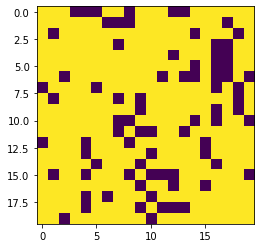

[(22, (3, 4)), (22, (4, 3)), (24, (3, 2)), (24, (2, 3))]
current node 3 4
[(22, (3, 5)), (22, (4, 4)), (22, (4, 3)), (24, (2, 4)), (24, (2, 3)), (24, (3, 2))]
current node 3 5
[(22, (3, 6)), (22, (4, 3)), (22, (4, 5)), (22, (4, 4)), (24, (2, 3)), (24, (3, 2)), (24, (2, 5)), (24, (2, 4))]
current node 3 6
[(22, (3, 7)), (22, (4, 3)), (22, (4, 5)), (22, (4, 6)), (22, (4, 4)), (24, (3, 2)), (24, (2, 5)), (24, (2, 6)), (24, (2, 4)), (24, (2, 3))]
current node 3 7
[(22, (3, 8)), (22, (4, 4)), (22, (4, 3)), (22, (4, 6)), (22, (4, 7)), (22, (4, 5)), (24, (2, 5)), (24, (2, 6)), (24, (2, 4)), (24, (2, 7)), (24, (2, 3)), (24, (3, 2))]
current node 3 8
[(22, (3, 9)), (22, (4, 4)), (22, (4, 3)), (22, (4, 6)), (22, (4, 7)), (22, (4, 8)), (22, (4, 5)), (24, (2, 6)), (24, (2, 4)), (24, (2, 7)), (24, (2, 3)), (24, (3, 2)), (24, (2, 8)), (24, (2, 5))]
current node 3 9
[(22, (3, 10)), (22, (4, 3)), (22, (4, 5)), (22, (4, 4)), (22, (4, 7)), (22, (4, 8)), (22, (4, 9)), (22, (4, 6)), (24, (2, 4)), (24, (2,

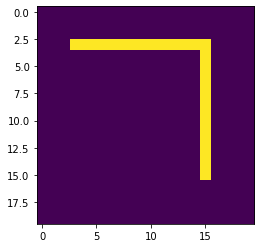

traversing nodes in reverse order  3 3
traversing nodes  3 4
traversing nodes  3 5
traversing nodes  3 6
traversing nodes  3 7
Blocked at node  3 6


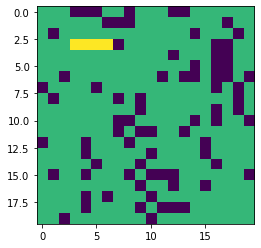

new current node is 3 6
[(19, (4, 6)), (21, (2, 6)), (21, (3, 5))]
current node 4 6
[(19, (4, 7)), (19, (5, 6)), (21, (2, 6)), (21, (4, 5)), (21, (3, 5))]
current node 4 7
[(19, (4, 8)), (19, (5, 7)), (19, (5, 6)), (21, (4, 5)), (21, (3, 5)), (21, (2, 6))]
current node 4 8
[(19, (4, 9)), (19, (5, 6)), (19, (5, 8)), (19, (5, 7)), (21, (3, 5)), (21, (3, 8)), (21, (2, 6)), (21, (4, 5))]
current node 4 9
[(19, (4, 10)), (19, (5, 6)), (19, (5, 8)), (19, (5, 9)), (19, (5, 7)), (21, (3, 8)), (21, (2, 6)), (21, (4, 5)), (21, (3, 9)), (21, (3, 5))]
current node 4 10
[(19, (4, 11)), (19, (5, 7)), (19, (5, 6)), (19, (5, 9)), (19, (5, 10)), (19, (5, 8)), (21, (2, 6)), (21, (4, 5)), (21, (3, 9)), (21, (3, 10)), (21, (3, 5)), (21, (3, 8))]
current node 4 11
[(19, (4, 12)), (19, (5, 7)), (19, (5, 6)), (19, (5, 9)), (19, (5, 10)), (19, (5, 11)), (19, (5, 8)), (21, (4, 5)), (21, (3, 9)), (21, (3, 10)), (21, (3, 5)), (21, (3, 11)), (21, (3, 8)), (21, (2, 6))]
current node 4 12
[(19, (4, 13)), (19, (5, 6

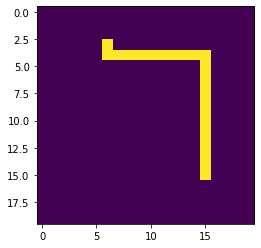

traversing nodes in reverse order  3 6
traversing nodes  4 6
traversing nodes  4 7
traversing nodes  4 8
traversing nodes  4 9
traversing nodes  4 10
traversing nodes  4 11
traversing nodes  4 12
Blocked at node  4 11


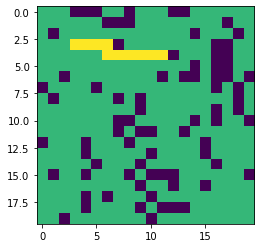

new current node is 4 11
[(13, (5, 11)), (15, (3, 11)), (15, (4, 10))]
current node 5 11
[(13, (5, 12)), (13, (6, 11)), (15, (3, 11)), (15, (5, 10)), (15, (4, 10))]
current node 5 12
[(13, (5, 13)), (13, (6, 12)), (13, (6, 11)), (15, (5, 10)), (15, (4, 10)), (15, (3, 11))]
current node 5 13
[(13, (5, 14)), (13, (6, 11)), (13, (6, 13)), (13, (6, 12)), (15, (4, 10)), (15, (4, 13)), (15, (3, 11)), (15, (5, 10))]
current node 5 14
[(13, (5, 15)), (13, (6, 11)), (13, (6, 13)), (13, (6, 14)), (13, (6, 12)), (15, (4, 13)), (15, (3, 11)), (15, (5, 10)), (15, (4, 14)), (15, (4, 10))]
current node 5 15
[(13, (5, 16)), (13, (6, 12)), (13, (6, 11)), (13, (6, 14)), (13, (6, 15)), (13, (6, 13)), (15, (3, 11)), (15, (5, 10)), (15, (4, 14)), (15, (4, 15)), (15, (4, 10)), (15, (4, 13))]
current node 5 16
[(13, (5, 17)), (13, (6, 12)), (13, (6, 11)), (13, (6, 14)), (13, (6, 15)), (13, (6, 16)), (13, (6, 13)), (15, (5, 10)), (15, (4, 14)), (15, (4, 15)), (15, (4, 10)), (15, (4, 16)), (15, (4, 13)), (15, 

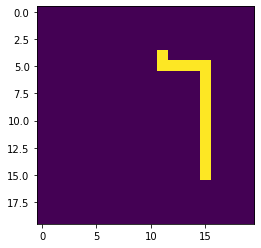

traversing nodes in reverse order  4 11
traversing nodes  5 11
traversing nodes  5 12
traversing nodes  5 13
traversing nodes  5 14
Blocked at node  5 13


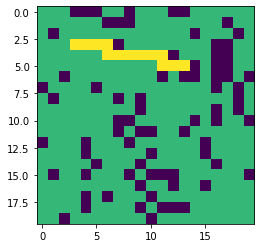

new current node is 5 13
[(12, (4, 13)), (12, (5, 12))]
current node 4 13
[(12, (4, 14)), (14, (3, 13)), (12, (5, 12))]
current node 4 14
[(12, (4, 15)), (12, (5, 12)), (14, (3, 14)), (14, (3, 13))]
current node 4 15
[(12, (4, 16)), (12, (5, 15)), (12, (5, 12)), (14, (3, 15)), (14, (3, 13)), (14, (3, 14))]
current node 4 16
[(12, (4, 17)), (12, (5, 12)), (12, (5, 16)), (12, (5, 15)), (14, (3, 13)), (14, (3, 16)), (14, (3, 14)), (14, (3, 15))]
current node 4 17
[(12, (4, 18)), (12, (5, 12)), (12, (5, 16)), (12, (5, 17)), (12, (5, 15)), (14, (3, 16)), (14, (3, 14)), (14, (3, 17)), (14, (3, 15)), (14, (3, 13))]
current node 4 18
[(12, (4, 19)), (12, (5, 15)), (12, (5, 12)), (12, (5, 17)), (12, (5, 18)), (12, (5, 16)), (14, (3, 14)), (14, (3, 17)), (14, (3, 15)), (14, (3, 18)), (14, (3, 13)), (14, (3, 16))]
current node 4 19
[(12, (5, 12)), (12, (5, 15)), (12, (5, 16)), (12, (5, 17)), (12, (5, 18)), (12, (5, 19)), (14, (3, 14)), (14, (3, 17)), (14, (3, 15)), (14, (3, 18)), (14, (3, 13)), (

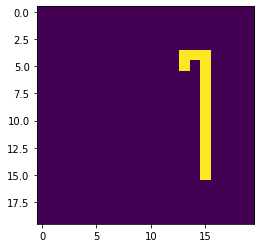

traversing nodes in reverse order  5 13
traversing nodes  4 13
traversing nodes  4 14
traversing nodes  4 15
traversing nodes  5 15
traversing nodes  6 15
traversing nodes  7 15
traversing nodes  8 15
traversing nodes  9 15
traversing nodes  10 15
traversing nodes  11 15
traversing nodes  12 15
Blocked at node  11 15


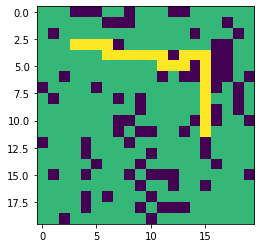

new current node is 11 15
[(2, (11, 16)), (4, (11, 14)), (4, (10, 15))]
current node 11 16
[(2, (11, 17)), (2, (12, 16)), (4, (10, 16)), (4, (11, 14)), (4, (10, 15))]
current node 11 17
[(2, (11, 18)), (4, (10, 15)), (2, (12, 16)), (4, (11, 14)), (4, (10, 17)), (4, (10, 16)), (2, (12, 17))]
current node 11 18
[(2, (11, 19)), (2, (12, 16)), (2, (12, 17)), (2, (12, 18)), (4, (10, 17)), (4, (10, 16)), (4, (10, 18)), (4, (11, 14)), (4, (10, 15))]
current node 11 19
[(2, (12, 16)), (2, (12, 18)), (2, (12, 17)), (4, (10, 15)), (2, (12, 19)), (4, (10, 16)), (4, (10, 18)), (4, (11, 14)), (4, (10, 19)), (4, (10, 17))]
current node 12 16
[(2, (12, 17)), (2, (12, 18)), (4, (10, 16)), (4, (10, 15)), (2, (12, 19)), (4, (10, 17)), (4, (10, 18)), (4, (11, 14)), (4, (10, 19)), (2, (13, 16))]
current node 12 17
[(2, (12, 18)), (2, (12, 19)), (4, (10, 16)), (4, (10, 15)), (2, (13, 16)), (4, (10, 17)), (4, (10, 18)), (4, (11, 14)), (4, (10, 19)), (2, (13, 17))]
current node 12 18
[(2, (12, 19)), (2, (13,

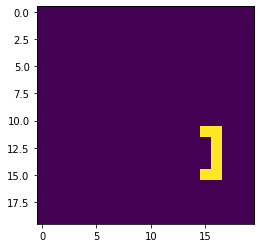

traversing nodes in reverse order  11 15
traversing nodes  11 16
traversing nodes  12 16
traversing nodes  13 16
traversing nodes  14 16
Blocked at node  13 16


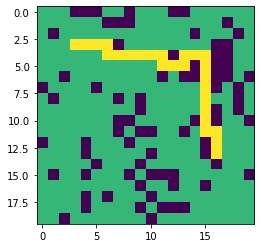

new current node is 13 16
[(-1, (13, 17)), (1, (12, 16))]
current node 13 17
[(-1, (13, 18)), (-1, (14, 17)), (1, (12, 16)), (1, (12, 17))]
current node 13 18
[(-1, (13, 19)), (-1, (14, 18)), (-1, (14, 17)), (1, (12, 18)), (1, (12, 17)), (1, (12, 16))]
current node 13 19
[(-1, (14, 17)), (-1, (14, 18)), (-1, (14, 19)), (1, (12, 18)), (1, (12, 17)), (1, (12, 19)), (1, (12, 16))]
current node 14 17
[(-1, (14, 18)), (1, (12, 16)), (-1, (14, 19)), (1, (12, 18)), (1, (12, 17)), (1, (12, 19)), (-1, (15, 17))]
current node 14 18
[(-1, (14, 19)), (1, (12, 16)), (-1, (15, 17)), (1, (12, 18)), (1, (12, 17)), (1, (12, 19)), (-1, (15, 18))]
current node 14 19
[(-1, (15, 17)), (1, (12, 16)), (-1, (15, 18)), (1, (12, 18)), (1, (12, 17)), (1, (12, 19)), (-1, (15, 19))]
current node 15 17
[(-1, (15, 18)), (1, (12, 16)), (-1, (15, 19)), (1, (12, 18)), (1, (12, 17)), (1, (12, 19)), (-1, (16, 17)), (1, (15, 16))]
current node 15 18
[(-1, (15, 19)), (-1, (16, 18)), (-1, (16, 17)), (1, (12, 16)), (1, (12, 

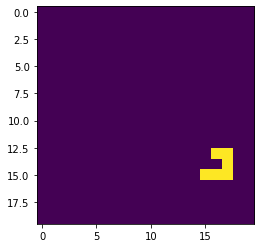

traversing nodes in reverse order  13 16
traversing nodes  13 17
traversing nodes  14 17
traversing nodes  15 17
traversing nodes  15 16
traversing nodes  15 15


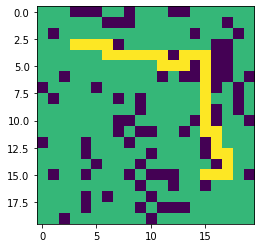

new current node is 15 15
[[1, 1, 1, -1, -1, -1, 1, 1, -1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1], [1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1], [1, 1, 1, 2, 2, 2, 2, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, -1, -1, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, -1, 2, -1, -1, 1, 1], [1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 2, -1, -1, 1, -1], [-1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, -1, 1, -1, 1], [1, -1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 2, 1, 1, -1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 2, -1, 1, -1, 1], [1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, -1, 2, -1, 1, 1, -1], [1, 1, 1, 1, 1, 1, 1, -1, 1, -1, -1, 1, 1, -1, 1, 2, 2, 1, 1, 1], [-1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1, -1, 2, 1, 1, 1], [1, 1, 1, 1, -1, 1, 1, 1, 1, 1, -1, 1, 1, 1, 1, -1, 2, 2, 1, 1], [1, 1, 1, 1, 1, -1, 1, 1, 1, -1, 1, 1, 1, 1, 1, 1

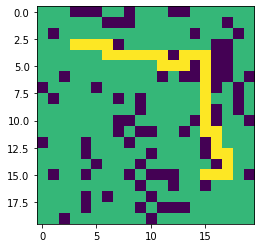

In [12]:

        

size = 20
maze = [0] * size
visited = [0] * size

for i in range(0,size):
    maze[i] = [0] * size

for i in range(0,size):
    visited[i] = [0] * size

i = 0
j = 0

while True:
    generate_random_matrix(maze,visited,i,j)
    i,j = get_unvisited_indices(visited)
    if i == -1 and j == -1:
      break


# maze = [[1, -1, 1, 1, 1], [1, 1, 1, 1, 1], [-1, 1, -1, 1, -1], [1, 1, 1, -1, -1], [1, 1, 1, 1, 1]]
# maze = [[1, 1, 1, 1, 1], [1, -1, 1, 1, -1], [1, 1, 1, -1, 1], [1, -1, -1, 1, 1], [1, 1, 1, 1, 1]]
nodes = [0] * size

source_i = 3
source_j = 3

destination_i = 15
destination_j = 15
for i in range(0,size):
    nodes[i] = [0] * size

for i in range(0,size):
    for j in range(0, size):
        nodes[i][j] = Node(i,j,sys.maxsize - 1000,(destination_i - 1 - i) + (destination_j -1 - j),None,-1)
        print(type(nodes[i][j]))


from queue import PriorityQueue
open_list = PriorityQueue()
print(maze)

initial_maze = np.array(maze)

plt.imshow(initial_maze)
plt.show()


AStarSearch(nodes,nodes[source_i][source_j],maze,nodes[destination_i][destination_j],open_list)

print(maze)
maze = np.array(maze)

plt.imshow(maze)
plt.show()



    



    


